**1. Pre-processing**

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
import tensorflow as tf
from keras import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.preprocessing import image
import random
import keras
from tensorflow.keras import Model, Sequential, applications
import matplotlib
from PIL import Image
import cv2 as cv
np.random.seed(2022)

In [ ]:
# Load the Tb disease dataset
Tb_df = pd.read_csv('/content/gdrive/MyDrive/TB ANALYZER/Tb disease symptoms.csv')
Tb_df.head()

,no,id,name,gender,date,time,fever for two weeks,coughing blood,sputum mixed with blood,night sweats,chest pain,back pain in certain parts,shortness of breath,weight loss,body feels tired,lumps that appear around the armpits and neck,cough and phlegm continuously for two weeks to four weeks,swollen lymph nodes,loss of appetite
0,1,8048761033,Noe,Male,12/10/2020,4:51 PM,0,1,1,1,1,1,1,1,0,0,1,0,1
1,2,793846900,Genna,Male,11/16/2020,9:35 AM,1,1,1,0,0,1,1,0,0,0,1,1,1
2,3,5619727459,Leesa,Male,1/18/2020,8:38 PM,0,0,1,1,0,1,0,0,0,1,1,1,1
3,4,4337104062,Case,Female,2/4/2020,3:09 PM,0,1,0,1,1,0,0,1,1,0,1,0,1
4,5,9507094539,Leola,Female,7/9/2020,5:51 PM,0,1,0,1,1,1,0,1,1,1,1,0,0


In [ ]:
Tb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                                                     Non-Null Count  Dtype 
---  ------                                                     --------------  ----- 
 0   no                                                         1000 non-null   int64 
 1   id                                                         1000 non-null   int64 
 2   name                                                       1000 non-null   object
 3   gender                                                     1000 non-null   object
 4   date                                                       1000 non-null   object
 5   time                                                       1000 non-null   object
 6   fever for two weeks                                        1000 non-null   int64 
 7   coughing blood                                             1000 non-null   int64 
 8   sputum mixed with b

In [ ]:
# to drop certain colums
to_drop = ['night sweats ','fever for two weeks','back pain in certain parts ','loss of appetite']

Tb_df.drop(to_drop, inplace=True, axis=1)

In [ ]:
Tb_df['name'].head(10)

0        Noe
1      Genna
2      Leesa
3       Case
4      Leola
5     Tandie
6     Renado
7    Aigneis
8     Galven
9       Kean
Name: name, dtype: object

In [ ]:
print(Tb_df.isnull())

        no     id   name  gender   date   time  coughing blood  \
0    False  False  False   False  False  False           False   
1    False  False  False   False  False  False           False   
2    False  False  False   False  False  False           False   
3    False  False  False   False  False  False           False   
4    False  False  False   False  False  False           False   
..     ...    ...    ...     ...    ...    ...             ...   
995  False  False  False   False  False  False           False   
996  False  False  False   False  False  False           False   
997  False  False  False   False  False  False           False   
998  False  False  False   False  False  False           False   
999  False  False  False   False  False  False           False   

     sputum mixed with blood  chest pain  shortness of breath  weight loss   \
0                      False       False                False         False   
1                      False       False         

In [ ]:
print(Tb_df.isnull().sum())

no                                                           0
id                                                           0
name                                                         0
gender                                                       0
date                                                         0
time                                                         0
coughing blood                                               0
sputum mixed with blood                                      0
chest pain                                                   0
shortness of breath                                          0
weight loss                                                  0
body feels tired                                             0
lumps that appear around the armpits and neck                0
cough and phlegm continuously for two weeks to four weeks    0
swollen lymph nodes                                          0
dtype: int64


In [ ]:
symptoms_2 = pd.read_csv('/content/gdrive/MyDrive/TB ANALYZER/Tb disease symptoms.csv')

In [ ]:
new = pd.concat([Tb_df, symptoms_2], axis="columns")
new.shape

(1000, 34)

In [ ]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 34 columns):
 #   Column                                                     Non-Null Count  Dtype 
---  ------                                                     --------------  ----- 
 0   no                                                         1000 non-null   int64 
 1   id                                                         1000 non-null   int64 
 2   name                                                       1000 non-null   object
 3   gender                                                     1000 non-null   object
 4   date                                                       1000 non-null   object
 5   time                                                       1000 non-null   object
 6   coughing blood                                             1000 non-null   int64 
 7   sputum mixed with blood                                    1000 non-null   int64 
 8   chest pain         

In [ ]:
new.head()

,no,id,name,gender,date,time,coughing blood,sputum mixed with blood,chest pain,shortness of breath,...,night sweats,chest pain,back pain in certain parts,shortness of breath,weight loss,body feels tired,lumps that appear around the armpits and neck,cough and phlegm continuously for two weeks to four weeks,swollen lymph nodes,loss of appetite
0,1,8048761033,Noe,Male,12/10/2020,4:51 PM,1,1,1,1,...,1,1,1,1,1,0,0,1,0,1
1,2,793846900,Genna,Male,11/16/2020,9:35 AM,1,1,0,1,...,0,0,1,1,0,0,0,1,1,1
2,3,5619727459,Leesa,Male,1/18/2020,8:38 PM,0,1,0,0,...,1,0,1,0,0,0,1,1,1,1
3,4,4337104062,Case,Female,2/4/2020,3:09 PM,1,0,1,0,...,1,1,0,0,1,1,0,1,0,1
4,5,9507094539,Leola,Female,7/9/2020,5:51 PM,1,0,1,0,...,1,1,1,0,1,1,1,1,0,0


In [ ]:
print(new.duplicated())

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool


In [ ]:
new =new.loc[:,~new.columns.duplicated()].copy()
new.columns

Index(['no', 'id', 'name', 'gender', 'date', 'time', 'coughing blood',
       'sputum mixed with blood', 'chest pain', 'shortness of breath',
       'weight loss ', 'body feels tired',
       'lumps that appear around the armpits and neck',
       'cough and phlegm continuously for two weeks to four weeks',
       'swollen lymph nodes', 'fever for two weeks', 'night sweats ',
       'back pain in certain parts ', 'loss of appetite'],
      dtype='object')

In [ ]:
new.isnull()

,no,id,name,gender,date,time,coughing blood,sputum mixed with blood,chest pain,shortness of breath,weight loss,body feels tired,lumps that appear around the armpits and neck,cough and phlegm continuously for two weeks to four weeks,swollen lymph nodes,fever for two weeks,night sweats,back pain in certain parts,loss of appetite
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
print(new.isnull().sum())

no                                                           0
id                                                           0
name                                                         0
gender                                                       0
date                                                         0
time                                                         0
coughing blood                                               0
sputum mixed with blood                                      0
chest pain                                                   0
shortness of breath                                          0
weight loss                                                  0
body feels tired                                             0
lumps that appear around the armpits and neck                0
cough and phlegm continuously for two weeks to four weeks    0
swollen lymph nodes                                          0
fever for two weeks                                    

In [ ]:
new['name'] = Tb_df['name'].str.strip()
new['name'] = Tb_df['name'].str.upper()
new

,no,id,name,gender,date,time,coughing blood,sputum mixed with blood,chest pain,shortness of breath,weight loss,body feels tired,lumps that appear around the armpits and neck,cough and phlegm continuously for two weeks to four weeks,swollen lymph nodes,fever for two weeks,night sweats,back pain in certain parts,loss of appetite
0,1,8048761033,NOE,Male,12/10/2020,4:51 PM,1,1,1,1,1,0,0,1,0,0,1,1,1
1,2,793846900,GENNA,Male,11/16/2020,9:35 AM,1,1,0,1,0,0,0,1,1,1,0,1,1
2,3,5619727459,LEESA,Male,1/18/2020,8:38 PM,0,1,0,0,0,0,1,1,1,0,1,1,1
3,4,4337104062,CASE,Female,2/4/2020,3:09 PM,1,0,1,0,1,1,0,1,0,0,1,0,1
4,5,9507094539,LEOLA,Female,7/9/2020,5:51 PM,1,0,1,0,1,1,1,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,8502616307,DIMITRI,Female,5/24/2020,12:39 PM,0,1,0,0,0,0,0,1,1,1,0,1,0
996,997,3468480814,AVERILL,Male,1/12/2020,6:47 PM,1,1,1,1,0,0,1,0,0,1,1,0,1
997,998,1317594584,HI,Female,12/2/2020,7:59 PM,1,1,0,0,1,0,0,0,0,1,0,0,0
998,999,4933185840,VIVIENNE,Female,11/11/2020,1:25 PM,1,0,1,1,0,0,0,1,1,0,1,1,1


In [ ]:
new['gender'] = new['gender'].str.replace('Male', 'M')
new['gender'] = new['gender'].str.replace('Female', 'F')
print(new)

       no          id      name gender        date      time  coughing blood  \
0       1  8048761033       NOE      M  12/10/2020   4:51 PM               1   
1       2   793846900     GENNA      M  11/16/2020   9:35 AM               1   
2       3  5619727459     LEESA      M   1/18/2020   8:38 PM               0   
3       4  4337104062      CASE      F    2/4/2020   3:09 PM               1   
4       5  9507094539     LEOLA      F    7/9/2020   5:51 PM               1   
..    ...         ...       ...    ...         ...       ...             ...   
995   996  8502616307   DIMITRI      F   5/24/2020  12:39 PM               0   
996   997  3468480814   AVERILL      M   1/12/2020   6:47 PM               1   
997   998  1317594584        HI      F   12/2/2020   7:59 PM               1   
998   999  4933185840  VIVIENNE      F  11/11/2020   1:25 PM               1   
999  1000  7056586694  BLONDELL      F   3/24/2020   8:06 PM               0   

     sputum mixed with blood  chest pai

In [ ]:
# to drop certain colums
to_drop = ['name','no']

new.drop(to_drop, inplace=True, axis=1)
new

,id,gender,date,time,coughing blood,sputum mixed with blood,chest pain,shortness of breath,weight loss,body feels tired,lumps that appear around the armpits and neck,cough and phlegm continuously for two weeks to four weeks,swollen lymph nodes,fever for two weeks,night sweats,back pain in certain parts,loss of appetite
0,8048761033,M,12/10/2020,4:51 PM,1,1,1,1,1,0,0,1,0,0,1,1,1
1,793846900,M,11/16/2020,9:35 AM,1,1,0,1,0,0,0,1,1,1,0,1,1
2,5619727459,M,1/18/2020,8:38 PM,0,1,0,0,0,0,1,1,1,0,1,1,1
3,4337104062,F,2/4/2020,3:09 PM,1,0,1,0,1,1,0,1,0,0,1,0,1
4,9507094539,F,7/9/2020,5:51 PM,1,0,1,0,1,1,1,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,8502616307,F,5/24/2020,12:39 PM,0,1,0,0,0,0,0,1,1,1,0,1,0
996,3468480814,M,1/12/2020,6:47 PM,1,1,1,1,0,0,1,0,0,1,1,0,1
997,1317594584,F,12/2/2020,7:59 PM,1,1,0,0,1,0,0,0,0,1,0,0,0
998,4933185840,F,11/11/2020,1:25 PM,1,0,1,1,0,0,0,1,1,0,1,1,1


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

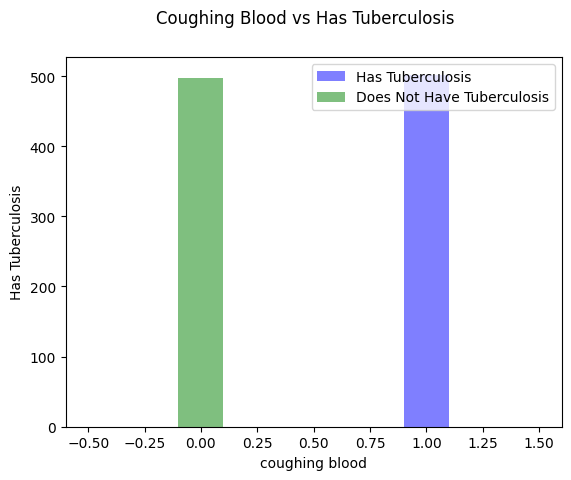

In [ ]:
fig, ax = plt.subplots()

ax.hist(new[new["coughing blood"]==1]["coughing blood"], bins=5, alpha=0.5, color="blue", label="Has Tuberculosis")
ax.hist(new[new["coughing blood"]==0]["coughing blood"], bins=5, alpha=0.5, color="green", label="Does Not Have Tuberculosis")

ax.set_xlabel("coughing blood")
ax.set_ylabel("Has Tuberculosis")

fig.suptitle("Coughing Blood vs Has Tuberculosis")

ax.legend();

2. EDA-**Visualisation**

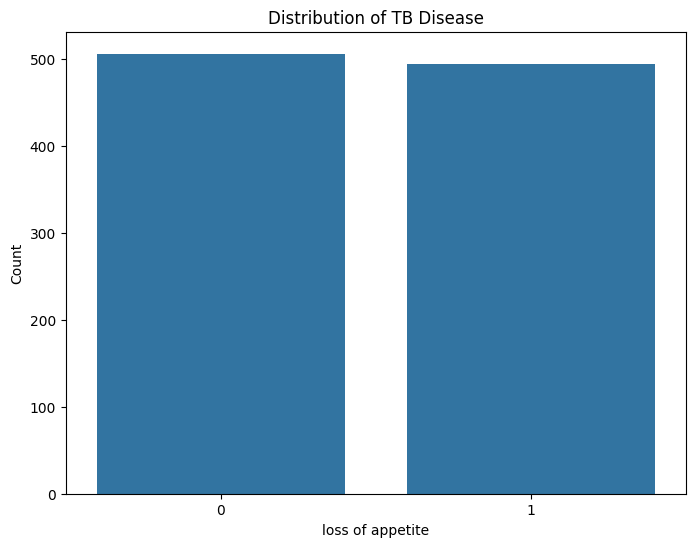

In [ ]:
# Load the Tb disease dataset
Tb_df = pd.read_csv('/content/gdrive/MyDrive/TB ANALYZER/Tb disease symptoms.csv')

# Visualize the distribution of the Loss of Apetite variable
plt.figure(figsize=(8, 6))
sns.countplot(x='loss of appetite', data=Tb_df)
plt.title('Distribution of TB Disease')
plt.xlabel('loss of appetite')
plt.ylabel('Count')
plt.show()

In [ ]:
# # Drop columns 'date' and 'time'
# to_drop = ['date','gender','time']
# final_df = new.drop(to_drop, inplace=True, axis=1)
# final_df

In [ ]:
Tb_df['name'] = pd.to_numeric(Tb_df['name'], errors='coerce')
Tb_df['gender'] = pd.to_numeric(Tb_df['gender'], errors='coerce')
Tb_df['date'] = pd.to_numeric(Tb_df['date'], errors='coerce')
Tb_df['time'] = pd.to_numeric(Tb_df['time'], errors='coerce')

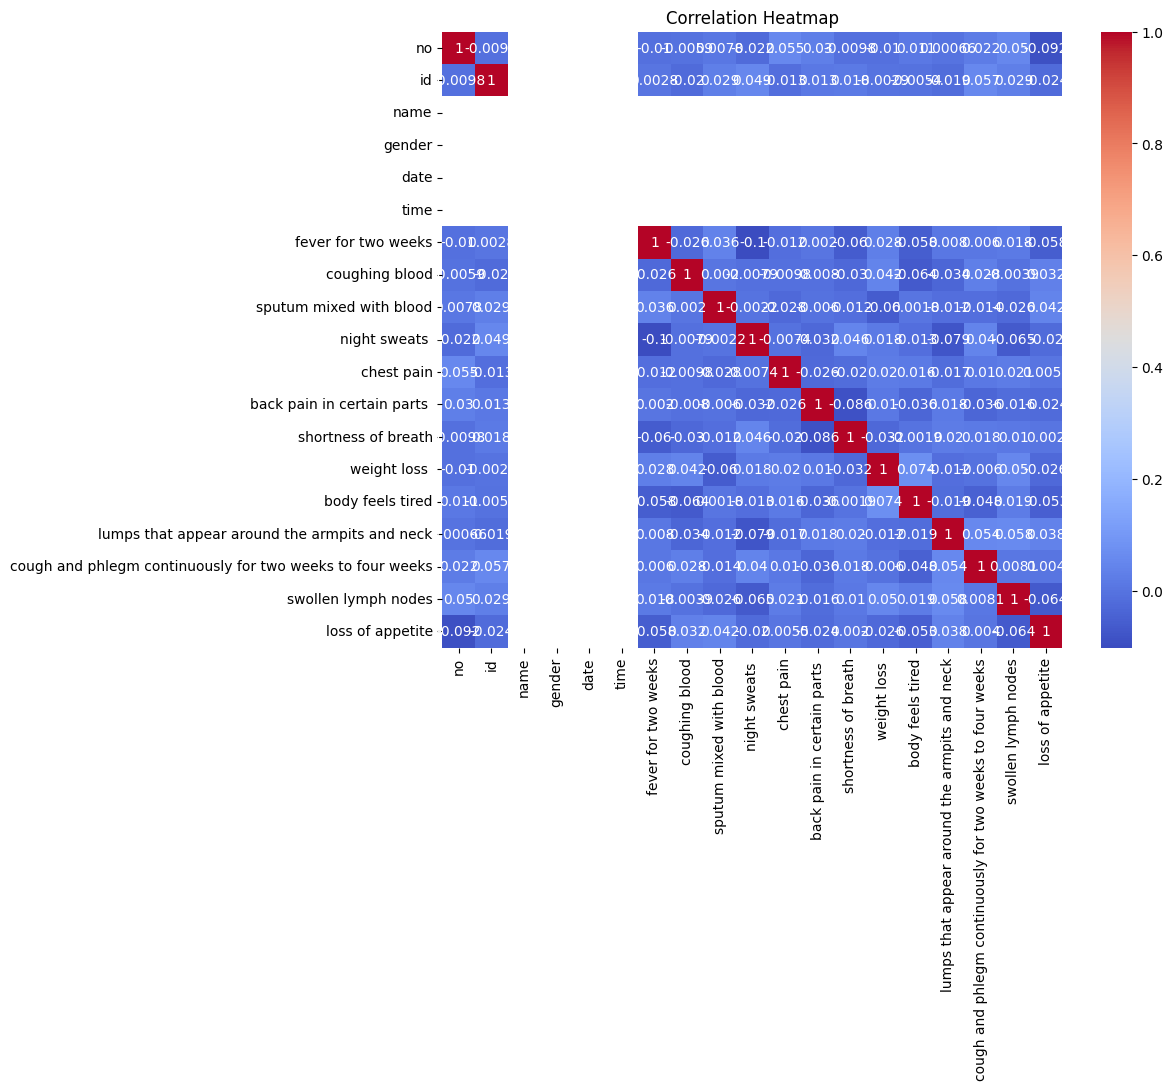

In [ ]:
# Visualize the correlation between variables using a heatmap

plt.figure(figsize=(10, 8))
sns.heatmap(Tb_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


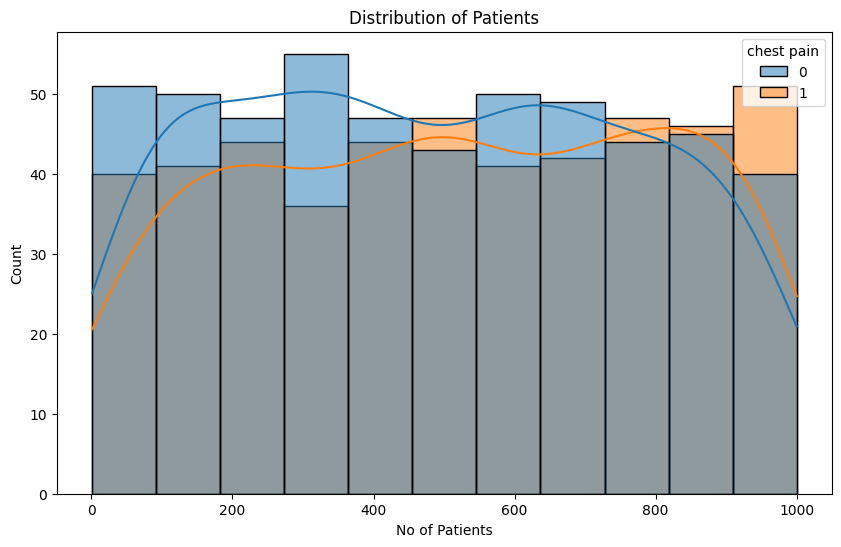

In [ ]:
# Visualize the distribution of patients with and without TB disease -1
plt.figure(figsize=(10, 6))
sns.histplot(data=Tb_df, x='no', hue='chest pain', kde=True)
plt.title('Distribution of Patients')
plt.xlabel('No of Patients')
plt.ylabel('Count')
plt.show()

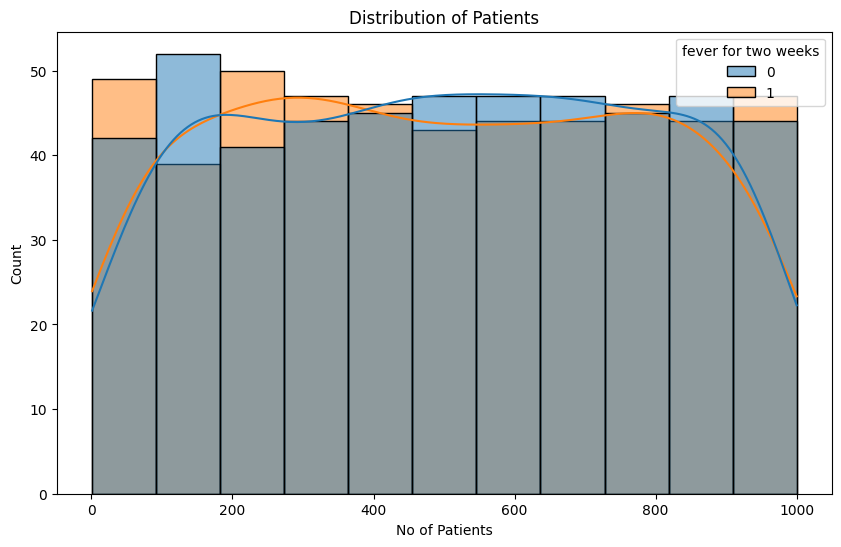

In [ ]:
# Visualize the distribution of patients with and without TB disease -2
plt.figure(figsize=(10, 6))
sns.histplot(data=Tb_df, x='no', hue='fever for two weeks', kde=True)
plt.title('Distribution of Patients')
plt.xlabel('No of Patients')
plt.ylabel('Count')
plt.show()

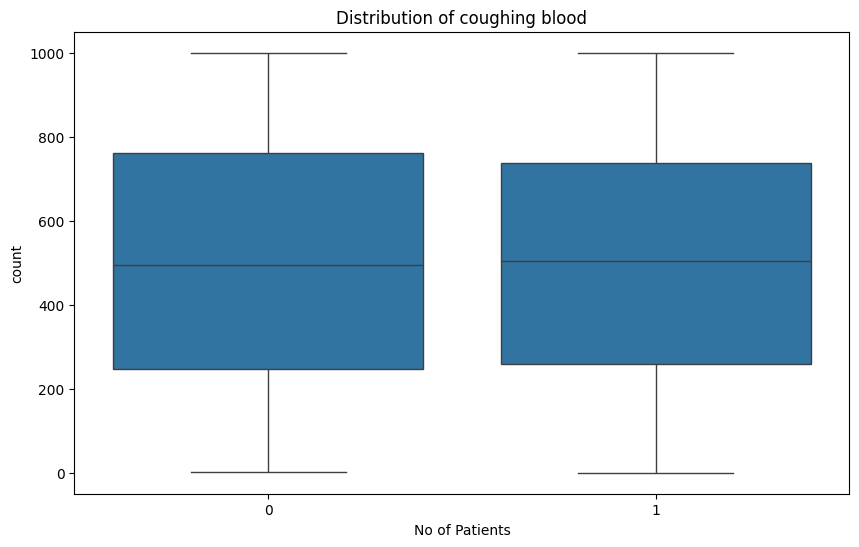

In [ ]:
# Visualize the distribution of coughing blood among patients with and without heart disease
plt.figure(figsize=(10, 6))
sns.boxplot(x='coughing blood', y='no', data=Tb_df)
plt.title('Distribution of coughing blood')
plt.xlabel('No of Patients')
plt.ylabel('count')
plt.show()

**3. Image Noarmalisation**

          Class  Num_Images  Mean_Height  Mean_Width  Min_Height  Min_Width  \
0        Normal        3455        512.0       512.0         512        512   
1  Tuberculosis         700        512.0       512.0         512        512   

   Max_Height  Max_Width  
0         512        512  
1         512        512  


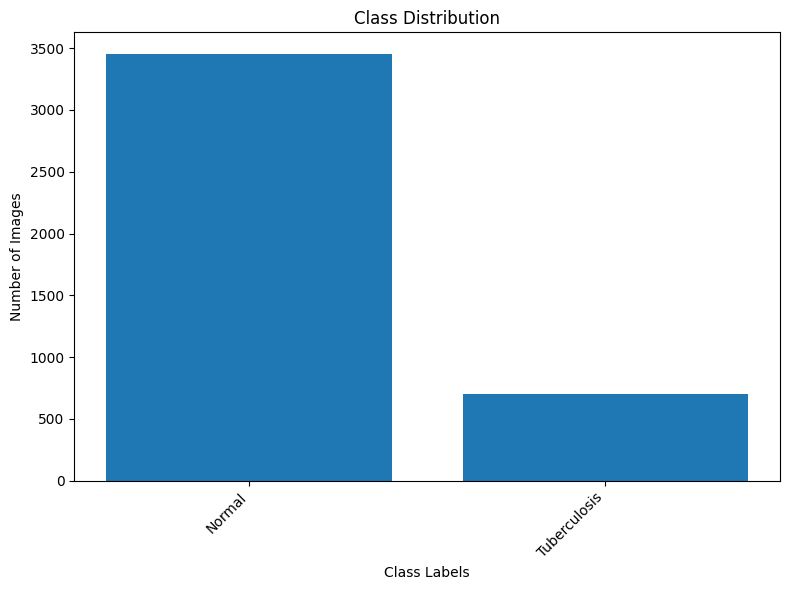

In [ ]:
data_directory = '/content/gdrive/MyDrive/TB ANALYZER/TB_Chest_Radiography_Database'
# Function to load the dataset and extract image statistics
def get_image_stats(data_dir):
    class_labels = ['Normal', 'Tuberculosis']
    image_stats = []

    for label in class_labels:
        class_dir = os.path.join(data_dir, label,"images")
        num_images = len(os.listdir(class_dir))
        image_sizes = []

        for image_file in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_file)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            height, width = image.shape
            image_sizes.append((height, width))

        image_sizes = np.array(image_sizes)
        mean_height, mean_width = np.mean(image_sizes, axis=0)
        min_height, min_width = np.min(image_sizes, axis=0)
        max_height, max_width = np.max(image_sizes, axis=0)

        image_stats.append({
            'Class': label,
            'Num_Images': num_images,
            'Mean_Height': mean_height,
            'Mean_Width': mean_width,
            'Min_Height': min_height,
            'Min_Width': min_width,
            'Max_Height': max_height,
            'Max_Width': max_width
        })

    return image_stats

# Get data summary
data_summary = get_image_stats(data_directory)

# Convert data summary to a pandas DataFrame for easier visualization
data_summary_df = pd.DataFrame(data_summary)

# Display the data summary
print(data_summary_df)

# Plot bar chart for class distribution
plt.figure(figsize=(8, 6))
plt.bar(data_summary_df['Class'], data_summary_df['Num_Images'])
plt.xlabel('Class Labels')
plt.ylabel('Number of Images')
plt.title('Class Distribution')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

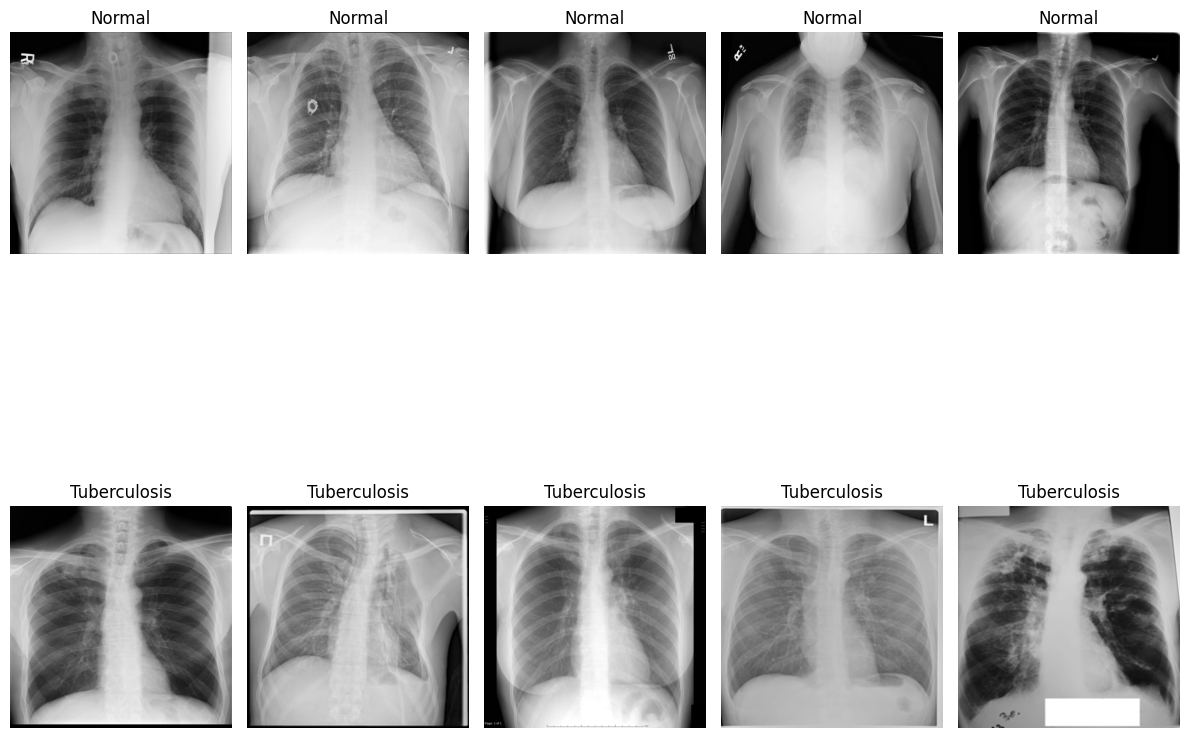

In [ ]:
data_directory = '/content/gdrive/MyDrive/TB ANALYZER/TB_Chest_Radiography_Database'
def load_sample_images(data_dir, num_samples=5):
    class_labels = ['Normal', 'Tuberculosis']
    sample_images = []

    for label in class_labels:
        class_dir = os.path.join(data_dir, label, "images")
        image_files = os.listdir(class_dir)
        sample_files = np.random.choice(image_files, num_samples, replace=False)

        for image_file in sample_files:
            image_path = os.path.join(class_dir, image_file)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

            sample_images.append((label, image))

    return sample_images

# Load sample X-ray images
num_samples_per_class = 5
sample_images = load_sample_images(data_directory, num_samples=num_samples_per_class)

fig, axes = plt.subplots(len(sample_images) // num_samples_per_class, num_samples_per_class, figsize=(12, 12))
for i, (label, image) in enumerate(sample_images):
    row = i // num_samples_per_class
    col = i % num_samples_per_class
    axes[row, col].imshow(image, cmap='gray')
    axes[row, col].axis('off')
    axes[row, col].set_title(label)

# Display the plot
plt.tight_layout()
plt.show()

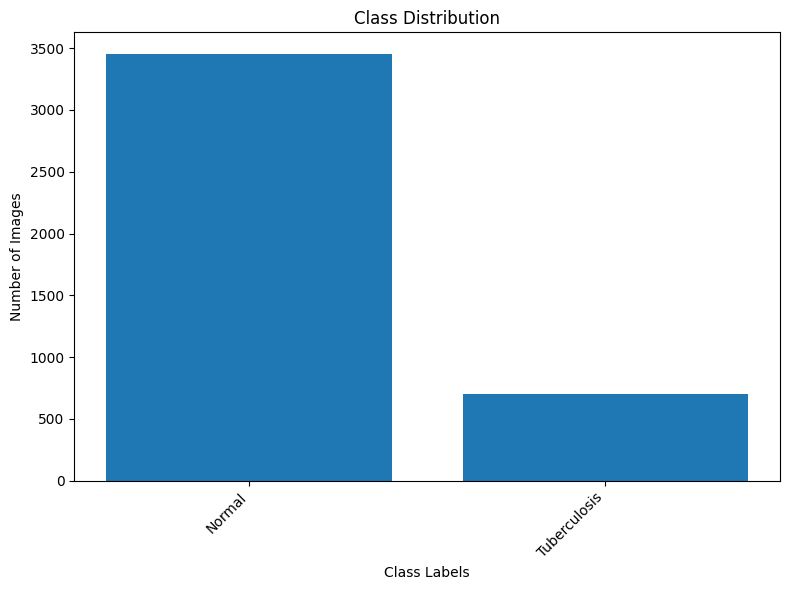

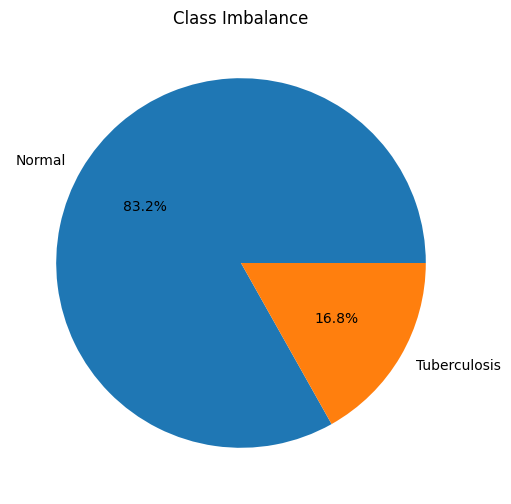

In [ ]:
# Calculate class distribution and visualize class imbalance
class_labels = ['Normal', 'Tuberculosis']
num_images_per_class = [len(os.listdir(os.path.join(data_directory, label, "images"))) for label in class_labels]

# Plot bar chart for class distribution
plt.figure(figsize=(8, 6))
plt.bar(class_labels, num_images_per_class)
plt.xlabel('Class Labels')
plt.ylabel('Number of Images')
plt.title('Class Distribution')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Visualize class imbalance (if any) with a pie chart
plt.figure(figsize=(6, 6))
plt.pie(num_images_per_class, labels=class_labels, autopct='%1.1f%%')
plt.title('Class Imbalance')
plt.show()

In [ ]:
import os
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# Data Preprocessing: Resizing
image_size = (128, 128)  # Choose the desired image size for resizing

def resize_images(data_dir, image_size):
    X, y = [], []
    class_labels = ['Normal', 'Tuberculosis']
    for i, label in enumerate(class_labels):
        class_dir = os.path.join(data_dir, label,"images")
        for image_file in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_file)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            image = cv2.resize(image, image_size)
            X.append(image)
            y.append(i)

    X = np.array(X)
    y = np.array(y)
    return X, y

# Load and preprocess the data
data_directory='/content/gdrive/MyDrive/TB ANALYZER/TB_Chest_Radiography_Database'
X, y = resize_images(data_directory, image_size)

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
# Data Augmentation
data_augmentation = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the pixel values to [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Convert the class labels to one-hot encoded vectors
num_classes = len(np.unique(y))
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Check the data shapes after preprocessing and augmentation
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3324, 128, 128)
y_train shape: (3324, 2)
X_test shape: (831, 128, 128)
y_test shape: (831, 2)


In [ ]:
X.shape, y.shape

((4155, 128, 128), (4155,))

In [ ]:
X_train.shape, y_train.shape

((3324, 128, 128), (3324, 2))

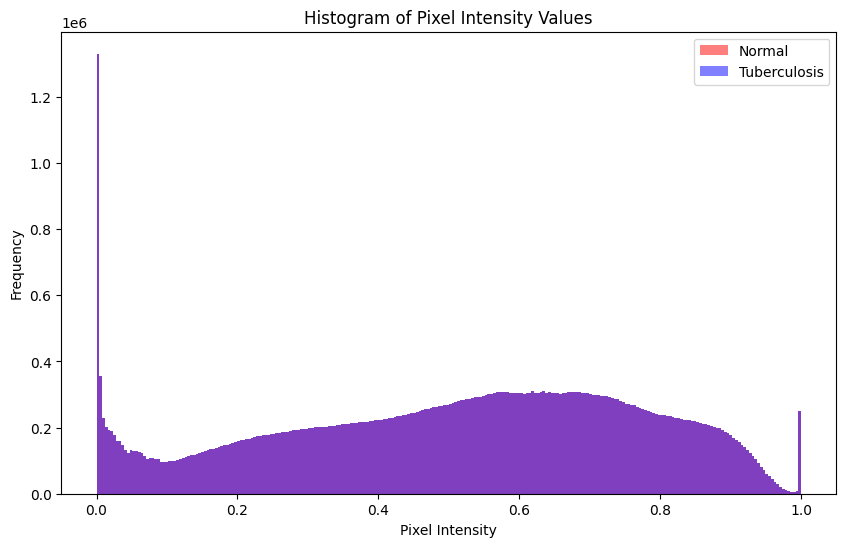

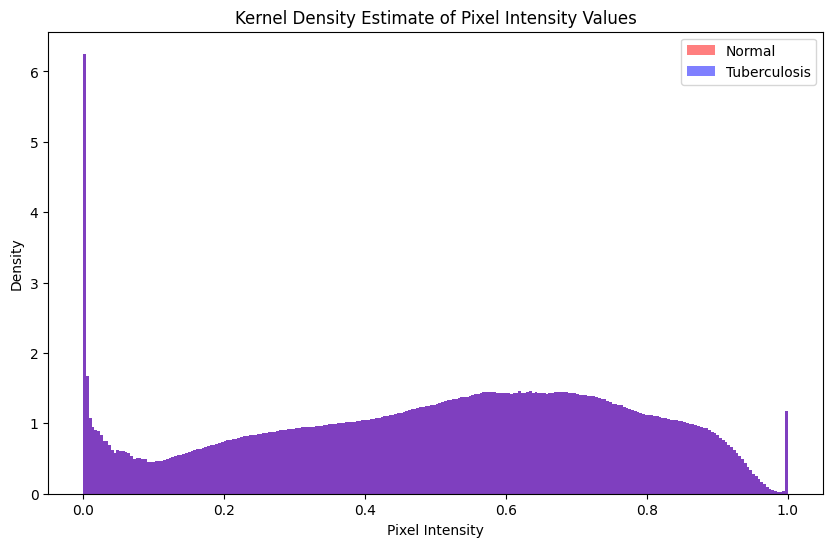

In [ ]:
y_train = np.squeeze(y_train)
y_train = y_train.astype(int)

normal_indices = np.where(y_train == 0)[0]
tuberculosis_indices = np.where(y_train == 1)[0]

normal_images = X_train[normal_indices]
tuberculosis_images = X_train[tuberculosis_indices]


# Plot histograms of pixel intensity values
plt.figure(figsize=(10, 6))
plt.hist(normal_images.flatten(), bins=256, alpha=0.5, label='Normal', color='red')
plt.hist(tuberculosis_images.flatten(), bins=256, alpha=0.5, label='Tuberculosis', color='blue')

plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Histogram of Pixel Intensity Values')
plt.legend()
plt.show()

# Alternatively, you can plot kernel density estimates (KDE)
plt.figure(figsize=(10, 6))
plt.hist(normal_images.flatten(), bins=256, density=True, alpha=0.5, label='Normal', color='red')
plt.hist(tuberculosis_images.flatten(), bins=256, density=True, alpha=0.5, label='Tuberculosis', color='blue')

plt.xlabel('Pixel Intensity')
plt.ylabel('Density')
plt.title('Kernel Density Estimate of Pixel Intensity Values')
plt.legend()
plt.show()

**4. TB ANALYSIS**

In [ ]:
# loading image
IMG_SHAPE = 300
batch_size = 32
data_dir = '/content/gdrive/MyDrive/TB ANALYZER/TB_Chest_Radiography_Database'
all_ds = tf.keras.preprocessing.image_dataset_from_directory(
                            data_dir,
                            image_size=(IMG_SHAPE, IMG_SHAPE),
                            seed= 2022,
                            batch_size=4200,
                            )
# loading the training image
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
                            data_dir,
                            image_size = (IMG_SHAPE, IMG_SHAPE),
                            batch_size=batch_size,
                            subset= 'training',
                            shuffle=True,
                            seed=2022,
                            validation_split = 0.2
                            )
# loading the testing image
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
                            data_dir,
                            seed=2022,
                            image_size=(IMG_SHAPE, IMG_SHAPE),
                            subset='validation',
                            shuffle=True,
                            validation_split = 0.2,
                            batch_size=batch_size)

Found 4155 files belonging to 2 classes.
Found 4155 files belonging to 2 classes.
Using 3324 files for training.
Found 4155 files belonging to 2 classes.
Using 831 files for validation.


In [ ]:
base_model = tf.keras.applications.MobileNetV2(weights='imagenet', input_shape=(300,300,3), include_top=False)

for layer in base_model.layers:
    layer.trainable=False
model = Sequential()
model.add(base_model)
model.add(GaussianNoise(0.25))
model.add(GlobalAveragePooling2D())
model.add(Dense(256,activation='relu'))
model.add(BatchNormalization())
model.add(GaussianNoise(0.25))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))
model.summary()

9406464/9406464 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 10, 10, 1280)      2257984   
 tional)                                                         
                                                                 
 gaussian_noise (GaussianNo  (None, 10, 10, 1280)      0         
 ise)                                                            
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 256)               327936    
                                                                 
 batch_normalization (Batch  (None, 256)               1024

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy','Precision','Recall','AUC'])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
lrp=ReduceLROnPlateau(monitor="val_accuracy", factor=0.1, patience=2)
filepath='best_model.h5'
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
call=[checkpoint,lrp]
history = model.fit(
    train_ds,
    epochs=10,
    validation_data=test_ds,
    steps_per_epoch= 50,
    callbacks=call
    )

Epoch 1/10
50/50 [==============================] - ETA: 0s - loss: 0.2777 - accuracy: 0.9006 - precision: 0.6286 - recall: 0.9380 - auc: 0.9787
Epoch 1: val_accuracy improved from -inf to 0.98917, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


50/50 [==============================] - 319s 5s/step - loss: 0.2777 - accuracy: 0.9006 - precision: 0.6286 - recall: 0.9380 - auc: 0.9787 - val_loss: 0.0674 - val_accuracy: 0.9892 - val_precision: 1.0000 - val_recall: 0.9328 - val_auc: 0.9948 - lr: 0.0010
Epoch 2/10
50/50 [==============================] - ETA: 0s - loss: 0.0815 - accuracy: 0.9831 - precision: 0.9367 - recall: 0.9723 - auc: 0.9905
Epoch 2: val_accuracy improved from 0.98917 to 0.99398, saving model to best_model.h5
50/50 [==============================] - 295s 6s/step - loss: 0.0815 - accuracy: 0.9831 - precision: 0.9367 - recall: 0.9723 - auc: 0.9905 - val_loss: 0.0487 - val_accuracy: 0.9940 - val_precision: 0.9924 - val_recall: 0.9701 - val_auc: 0.9965 - lr: 0.0010
Epoch 3/10
 4/50 [=>............................] - ETA: 2:03 - loss: 0.0967 - accuracy: 0.9919 - precision: 0.9500 - recall: 1.0000 - auc: 0.9945


Epoch 3: val_accuracy improved from 0.99398 to 0.99519, saving model to best_model.h5
50/50 [==============================] - 84s 2s/step - loss: 0.0967 - accuracy: 0.9919 - precision: 0.9500 - recall: 1.0000 - auc: 0.9945 - val_loss: 0.0485 - val_accuracy: 0.9952 - val_precision: 1.0000 - val_recall: 0.9701 - val_auc: 0.9958 - lr: 0.0010


In [ ]:
model.evaluate(train_ds) #train generator

104/104 [==============================] - 349s 3s/step - loss: 0.0482 - accuracy: 0.9922 - precision: 0.9963 - recall: 0.9576 - auc: 0.9984


[0.04815252497792244,
 0.9921780824661255,
 0.9963235259056091,
 0.9575971961021423,
 0.9984439015388489]

In [ ]:
model.evaluate(test_ds) #test generator

26/26 [==============================] - 70s 3s/step - loss: 0.0485 - accuracy: 0.9952 - precision: 1.0000 - recall: 0.9701 - auc: 0.9958


[0.04851759597659111,
 0.9951865077018738,
 1.0,
 0.9701492786407471,
 0.9958243370056152]

1/1 [==============================] - 1s 1s/step
[[0.98756266]]
THE UPLOADED CHEST XRAY IMAGE IS: Tuberculosis


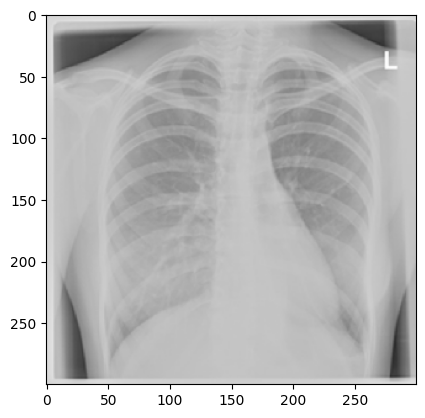

In [ ]:
from tensorflow.keras.utils import load_img, img_to_array
img = load_img('/content/gdrive/MyDrive/TB ANALYZER/TB_Chest_Radiography_Database/Tuberculosis/images/Tuberculosis-160.png',target_size=(300,300))
imag = img_to_array(img)
imaga = np.expand_dims(imag,axis=0)
ypred = model.predict(imaga)
print(ypred)
a=ypred[0]
if a>0.5:
      op="Tuberculosis"
else:
      op="Normal"
plt.imshow(img)
print("THE UPLOADED CHEST XRAY IMAGE IS: "+str(op))

1/1 [==============================] - 0s 247ms/step
[[0.01575114]]
THE UPLOADED CHEST XRAY IMAGE IS: Normal


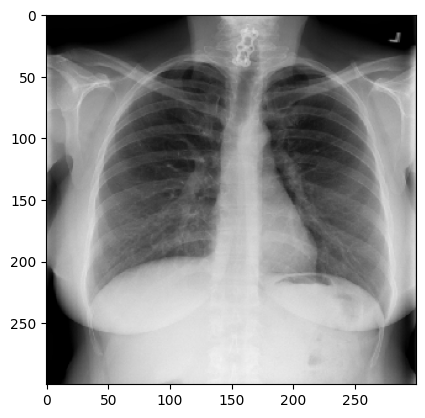

In [ ]:
from tensorflow.keras.utils import load_img, img_to_array
img = load_img('/content/gdrive/MyDrive/TB ANALYZER/TB_Chest_Radiography_Database/Normal/images/Normal-1042.png',target_size=(300,300))
imag = img_to_array(img)
imaga = np.expand_dims(imag,axis=0)
ypred = model.predict(imaga)
print(ypred)
a=ypred[0]
if a<0.5:
      op="Normal"
else:
      op="Tuberculosis"
plt.imshow(img)
print("THE UPLOADED CHEST XRAY IMAGE IS: "+str(op))
